# Préparation de l'environnement et du fichier

In [55]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Lecture du fichier
df=pd.read_csv("eco2mix_clean.csv",low_memory=False)
#paramétrer les nombres à virgule flottante pour qu'ils ne s'affichent pas en puissances 
np.set_printoptions(suppress=True)

In [56]:
# Configurer l'affichage des nombres à virgule flottante
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Configurer pandas pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

In [74]:
# passage des colonnes temporelles en type date time
df['Date']=pd.to_datetime(df['Date'])
df['Date - Heure'] = pd.to_datetime(df['Date - Heure'])
df['Heure'] = pd.to_datetime(df['Heure'], format='%H:%M:%S').dt.time
#convertir la colonne code INSEE en string
df['Code INSEE région'] = df['Code INSEE région'].astype('str')

In [75]:
df

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),TCO Thermique (%),TCH Thermique (%),TCO Nucléaire (%),TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),JourSemaine
0,44,Grand Est,Données définitives,2013-01-01,00:30:00,2012-12-31 23:30:00+00:00,4943.00,319.00,9137.00,1109.00,0.00,1418.00,0.00,57.00,-7102.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
1,11,Île-de-France,Données définitives,2013-01-01,16:30:00,2013-01-01 15:30:00+00:00,8486.00,695.00,9665.00,2.00,2.00,0.00,0.00,140.00,7646.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
2,24,Centre-Val de Loire,Données définitives,2013-01-01,16:30:00,2013-01-01 15:30:00+00:00,1954.00,90.00,10193.00,92.00,11.00,34.00,0.00,25.00,-8494.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
3,28,Normandie,Données définitives,2013-01-01,16:00:00,2013-01-01 15:00:00+00:00,3010.00,436.00,8374.00,139.00,5.00,12.00,0.00,54.00,-6014.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
4,27,Bourgogne-Franche-Comté,Données définitives,2013-01-01,16:00:00,2013-01-01 15:00:00+00:00,2221.00,234.00,7691.50,33.00,7.00,106.00,0.00,13.00,1824.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121391,27,Bourgogne-Franche-Comté,Données consolidées,2023-01-31,08:00:00,2023-01-31 07:00:00+00:00,3229.00,169.00,0.00,55.00,0.00,252.00,0.00,41.00,2713.00,5.23,44.13,0.00,56.07,1.70,5.36,0.00,0.00,7.80,48.18,1.27,51.25,1
2121392,75,Nouvelle-Aquitaine,Données consolidées,2023-01-31,08:00:00,2023-01-31 07:00:00+00:00,6931.00,153.00,3717.00,57.00,0.00,734.00,0.00,107.00,2163.00,2.21,27.37,53.63,56.06,0.82,3.60,0.00,0.00,10.59,32.75,1.54,32.82,1
2121393,44,Grand Est,Données consolidées,2023-01-31,08:00:00,2023-01-31 07:00:00+00:00,6786.00,1600.00,4763.00,571.00,0.00,905.00,0.00,143.00,-1196.00,23.58,51.04,70.19,44.02,8.41,12.55,0.00,0.00,13.34,39.31,2.11,55.00,1
2121394,11,Île-de-France,Données consolidées,2023-01-31,11:30:00,2023-01-31 10:30:00+00:00,11486.00,385.00,0.00,23.00,30.00,8.00,0.00,139.00,10901.00,3.35,17.72,0.00,44.02,0.20,15.86,0.26,11.81,0.07,42.11,1.21,43.57,1


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121396 entries, 0 to 2121395
Data columns (total 28 columns):
 #   Column               Dtype              
---  ------               -----              
 0   Code INSEE région    object             
 1   Région               object             
 2   Nature               object             
 3   Date                 datetime64[ns]     
 4   Heure                object             
 5   Date - Heure         datetime64[ns, UTC]
 6   Consommation (MW)    float64            
 7   Thermique (MW)       float64            
 8   Nucléaire (MW)       float64            
 9   Eolien (MW)          float64            
 10  Solaire (MW)         float64            
 11  Hydraulique (MW)     float64            
 12  Pompage (MW)         float64            
 13  Bioénergies (MW)     float64            
 14  Ech. physiques (MW)  float64            
 15  TCO Thermique (%)    float64            
 16  TCH Thermique (%)    float64            
 17  TCO Nucl

In [ ]:
#répartir les colonnes en 3 groupes pour les variables numériques, catégorielles et temporelles
col_num = df[['Consommation (MW)', 'Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)', 
            'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)', 'Pompage (MW)', 'Ech. physiques (MW)',
            'TCO Nucléaire (%)', 'TCH Nucléaire (%)',
            'TCH Thermique (%)', 'TCO Thermique (%)',
            'TCO Eolien (%)', 'TCH Eolien (%)',
            'TCO Hydraulique (%)', 'TCH Hydraulique (%)',
            'TCO Solaire (%)', 'TCH Solaire (%)',
            'TCO Bioénergies (%)', 'TCH Bioénergies (%)']]
col_cat = df[['Code INSEE région','Région', 'Nature' ]]
col_temp = df[['Date', 'Heure', 'Date - Heure', 'JourSemaine']]
col_TCH = df[['TCH Nucléaire (%)','TCH Thermique (%)', 'TCH Eolien (%)', 'TCH Hydraulique (%)','TCH Solaire (%)', 'TCH Bioénergies (%)']]
col_TC0 = df[['TCO Nucléaire (%)','TCO Thermique (%)', 'TCO Eolien (%)', 'TCO Hydraulique (%)','TCO Solaire (%)', 'TCO Bioénergies (%)']]
col_MW = df[['Consommation (MW)', 'Nucléaire (MW)', 'Thermique (MW)', 'Eolien (MW)', 
            'Solaire (MW)', 'Hydraulique (MW)', 'Bioénergies (MW)', 'Pompage (MW)', 'Ech. physiques (MW)']]

# Analyse des variables numériques

In [97]:
col_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Consommation (MW),2121396.00,4473.43,2162.12,703.00,2768.00,4102.00,5708.00,15338.00
Nucléaire (MW),2121396.00,5649.03,3196.44,0.00,3353.00,5671.00,8049.00,13632.00
Thermique (MW),2121396.00,382.06,540.54,0.00,25.00,161.00,501.00,4293.00
Eolien (MW),2121396.00,265.70,450.90,0.00,29.00,109.00,309.00,4971.00
Solaire (MW),2121396.00,96.96,238.53,0.00,0.00,0.00,70.00,2882.00
Hydraulique (MW),2121396.00,589.47,1014.27,0.00,5.00,55.00,861.00,8468.00
Bioénergies (MW),2121396.00,84.95,45.25,4.00,49.00,77.00,117.00,2300.00
Pompage (MW),2121396.00,-108.10,280.51,-2580.00,-19.00,-0.50,0.00,0.00
Ech. physiques (MW),2121396.00,-439.01,4297.30,-12787.00,-4044.00,579.00,2214.00,13959.00
TCO Nucléaire (%),2121396.00,31.37,78.20,0.00,0.00,0.00,0.00,796.52


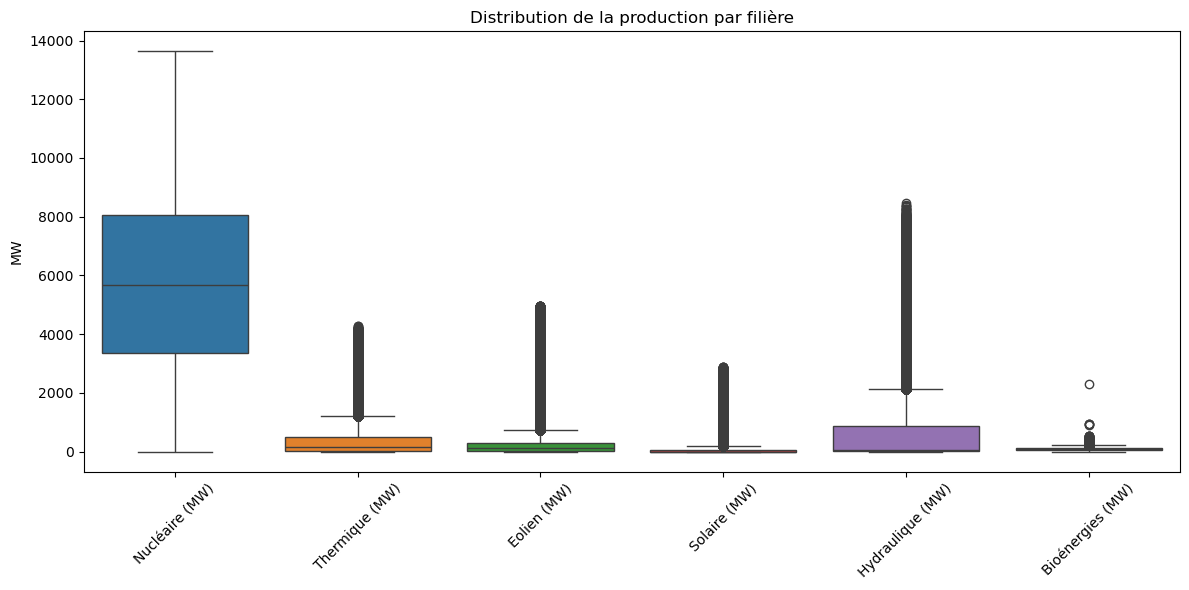

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=col_num)
plt.title('Distribution de la production par filière')
plt.ylabel('MW')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

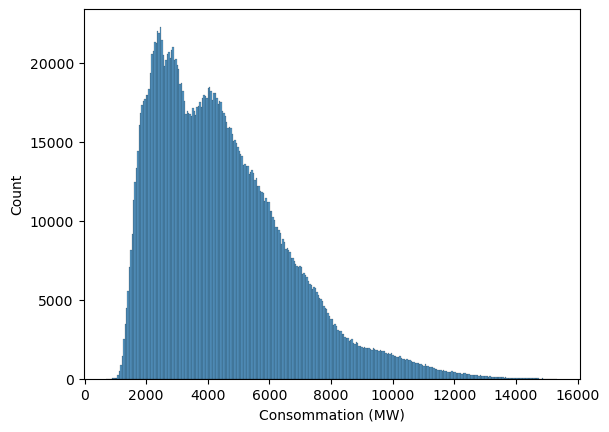

In [86]:
sns.histplot(df['Consommation (MW)']);

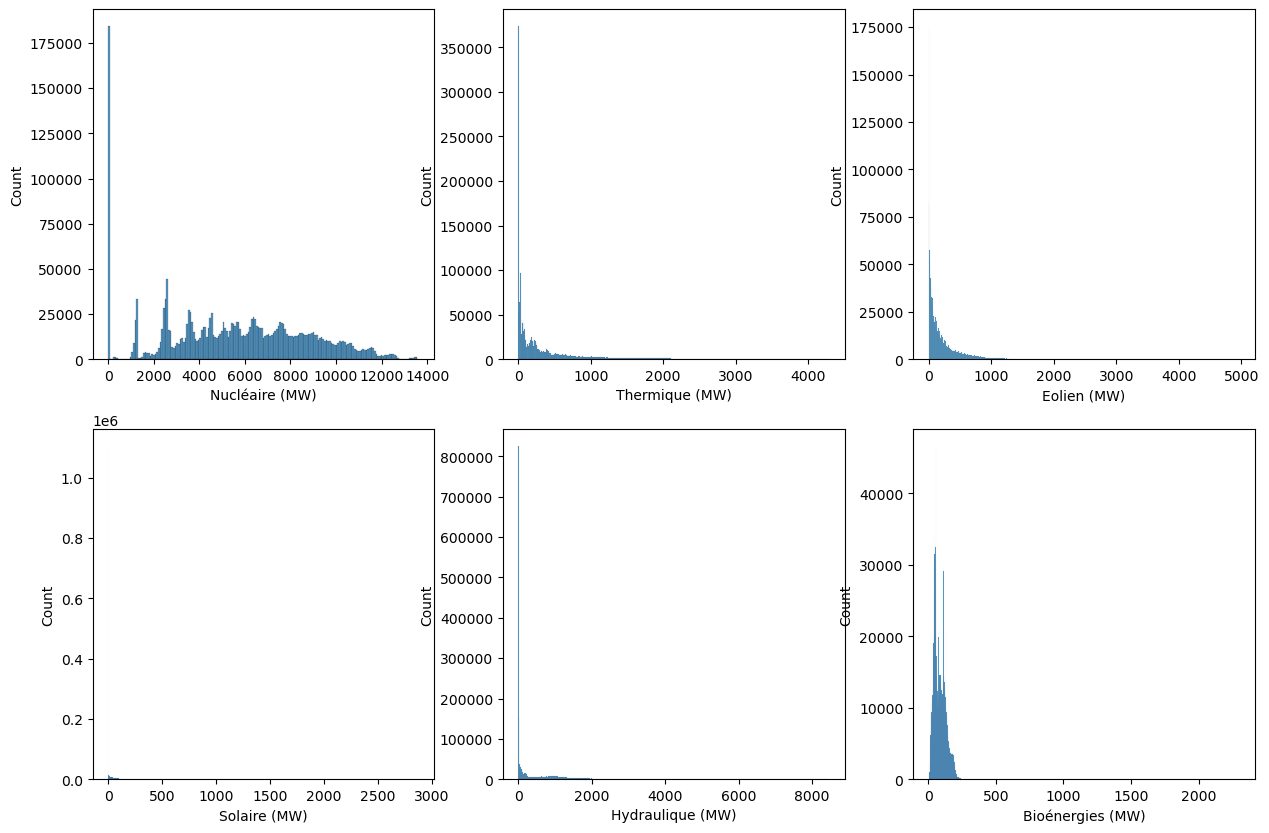

In [92]:
plt.figure( figsize= (15,10) )

for i,j in enumerate(col_num):
    plt.subplot(2,3,i+1)
    sns.histplot(df[j])


<Axes: >

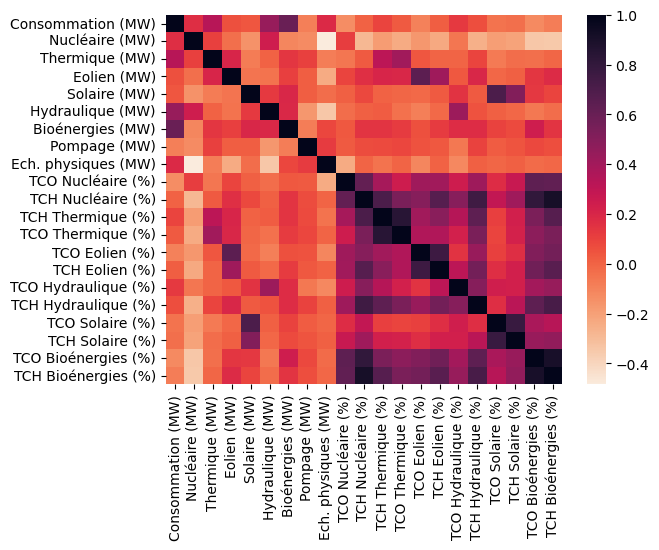

In [120]:
sns.heatmap(col_num.corr(), cmap="rocket_r")

<Axes: xlabel='Consommation (MW)', ylabel='Bioénergies (MW)'>

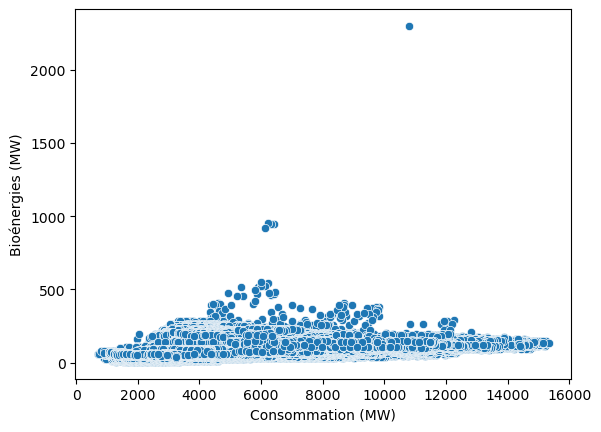

In [124]:
sns.scatterplot(data=df[['Consommation (MW)', 'Bioénergies (MW)']], x = 'Consommation (MW)', y = 'Bioénergies (MW)')

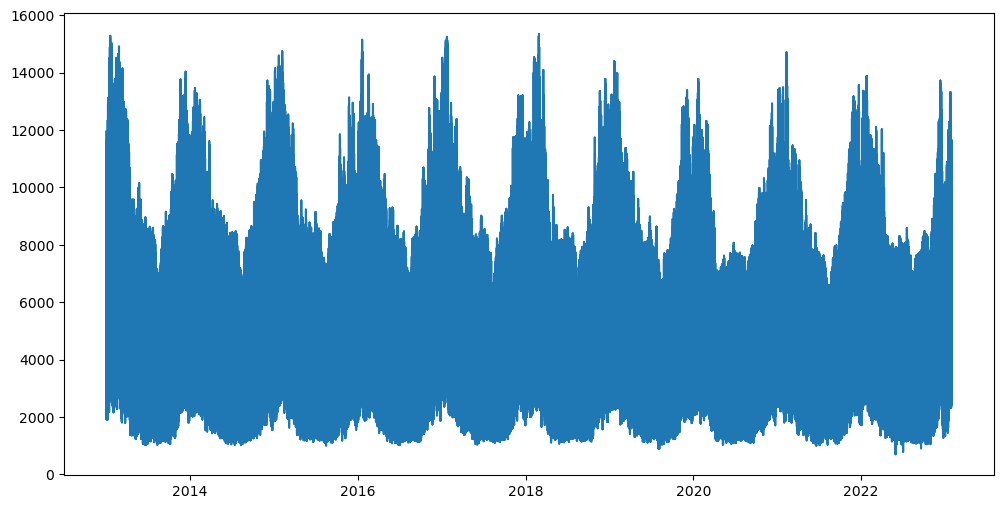

In [128]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Consommation (MW)'])

# Analyse des variables catégorielles

In [ ]:
# liste des valeurs et mode
for col in col_cat:
    if df[col].dtype == 'object':
        print('variable :',col)
        print('valeurs :',df[col].unique())
        print('mode :')
        display(df[col].mode())
        print('...')

#le mode nous permet de voir qu'aucune valeur n'apparait plus que les autres dans les colonnes code insee region et region 

variable : Code INSEE région
valeurs : ['44' '11' '24' '28' '27' '53' '52' '75' '76' '32' '93' '84']
mode :


0     11
1     24
2     27
3     28
4     32
5     44
6     52
7     53
8     75
9     76
10    84
11    93
Name: Code INSEE région, dtype: object

...
variable : Région
valeurs : ['Grand Est' 'Île-de-France' 'Centre-Val de Loire' 'Normandie'
 'Bourgogne-Franche-Comté' 'Bretagne' 'Pays de la Loire'
 'Nouvelle-Aquitaine' 'Occitanie' 'Hauts-de-France'
 "Provence-Alpes-Côte d'Azur" 'Auvergne-Rhône-Alpes']
mode :


0           Auvergne-Rhône-Alpes
1        Bourgogne-Franche-Comté
2                       Bretagne
3            Centre-Val de Loire
4                      Grand Est
5                Hauts-de-France
6                      Normandie
7             Nouvelle-Aquitaine
8                      Occitanie
9               Pays de la Loire
10    Provence-Alpes-Côte d'Azur
11                 Île-de-France
Name: Région, dtype: object

...
variable : Nature
valeurs : ['Données définitives' 'Données consolidées']
mode :


0    Données définitives
Name: Nature, dtype: object

...
